# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, **BikeIndia** aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

##  Reading and Understanding the Data


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bismillahskripsi/Buleleng-Climate - Full (1).csv
/kaggle/input/bike-sharing/day.csv


In [4]:
bike = pd.read_csv("/kaggle/input/bismillahskripsi/Buleleng-Climate - Full (1).csv")

In [5]:
# Check the head of the dataset
bike.head()

,Year,Periode,Produktivitas Mangga,Produktivitas Jeruk,Max,Min,Tavg,Sun Hour,Sun Day,Curah Hujan,Hari Hujan,Kecepatan A,Mx Kec
0,2012,Triwulan I,0.46,0.17,28.0,25.0,26.00,78.7,8,501,83,8.17,13.4
1,2012,Triwulan II,0.00,0.10,28.0,24.0,26.00,237.7,49,164,42,8.93,14.0
2,2012,Triwulan III,0.27,0.20,28.0,22.0,24.33,336.3,88,10,4,12.20,17.2
3,2012,Triwulan IV,0.46,0.11,29.0,25.0,27.00,176.0,24,375,68,7.93,13.6
4,2013,Triwulan I,0.65,0.16,28.0,25.0,27.00,140.7,20,338,70,7.33,12.0


In [6]:
# Check the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  40 non-null     int64  
 1   Periode               40 non-null     object 
 2   Produktivitas Mangga  40 non-null     float64
 3   Produktivitas Jeruk   40 non-null     float64
 4   Max                   40 non-null     float64
 5   Min                   40 non-null     float64
 6   Tavg                  40 non-null     float64
 7   Sun Hour              40 non-null     float64
 8   Sun Day               40 non-null     int64  
 9   Curah Hujan           40 non-null     int64  
 10  Hari Hujan            40 non-null     int64  
 11  Kecepatan A           40 non-null     float64
 12  Mx Kec                40 non-null     float64
dtypes: float64(8), int64(4), object(1)
memory usage: 4.2+ KB


In [7]:
bike.describe()

,Year,Produktivitas Mangga,Produktivitas Jeruk,Max,Min,Tavg,Sun Hour,Sun Day,Curah Hujan,Hari Hujan,Kecepatan A,Mx Kec
count,40.000000,40.0000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.00000
mean,2016.500000,0.4385,0.188500,29.175000,24.700000,26.683500,191.615000,40.05000,296.975000,63.725000,7.432500,11.94000
std,2.908872,0.2978,0.174922,0.930605,0.992278,1.010064,78.482399,25.66645,345.464421,67.614665,1.631161,2.36706
min,2012.000000,0.0000,0.000000,28.000000,22.000000,24.330000,30.000000,6.00000,4.000000,4.000000,5.170000,7.90000
25%,2014.000000,0.2550,0.100000,28.000000,24.000000,26.000000,137.025000,20.00000,93.750000,30.250000,6.322500,10.27500
50%,2016.500000,0.4900,0.160000,29.000000,25.000000,26.835000,182.000000,29.50000,246.500000,51.500000,7.120000,12.05000
75%,2019.000000,0.5900,0.242500,30.000000,25.000000,27.670000,239.450000,57.00000,385.750000,69.250000,8.117500,13.67500
max,2021.000000,1.3700,0.850000,31.000000,26.000000,28.330000,336.300000,88.00000,2008.000000,385.000000,12.200000,17.20000


In [8]:
# Check the shape of df

print(bike.shape)

(40, 13)


## Finding : 
Dataset has 40 rows and 13 columns.

variable 'Sun day', 'Curah Hujan', 'Hari hujan' berbentuk *int* untuk variable 'Periode' berupa **string**

Selain itu, semua variable berupa **float**

# DATA QUALITY CHECK

## Check for NULL/MISSING values

In [9]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

Mx Kec                  0.0
Kecepatan A             0.0
Hari Hujan              0.0
Curah Hujan             0.0
Sun Day                 0.0
Sun Hour                0.0
Tavg                    0.0
Min                     0.0
Max                     0.0
Produktivitas Jeruk     0.0
Produktivitas Mangga    0.0
Periode                 0.0
Year                    0.0
dtype: float64

In [10]:
# row-wise null count percentage
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

39    0.0
38    0.0
17    0.0
16    0.0
15    0.0
14    0.0
13    0.0
12    0.0
11    0.0
10    0.0
9     0.0
8     0.0
7     0.0
6     0.0
5     0.0
4     0.0
3     0.0
2     0.0
1     0.0
18    0.0
19    0.0
20    0.0
30    0.0
37    0.0
36    0.0
35    0.0
34    0.0
33    0.0
32    0.0
31    0.0
29    0.0
21    0.0
28    0.0
27    0.0
26    0.0
25    0.0
24    0.0
23    0.0
22    0.0
0     0.0
dtype: float64

## Finding
There are no missing / Null values either in columns or rows

## Duplicate Check

In [11]:
bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [12]:
bike_dup.shape

(40, 13)

In [13]:
bike.shape

(40, 13)

### Insights 

The shape after running the drop duplicate command is same as the original dataframe. 

Hence we can conclude that there were zero duplicate values in the dataset. 

## Data Cleaning

Checking value_counts() for entire dataframe. 

This will help to identify any Unknow/Junk values present in the dataset.

In [14]:
#Create a copy of the  dataframe, without the 'instant' column, 

#as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=bike.iloc[:,1:16]

In [15]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

Triwulan IV     10
Triwulan III    10
Triwulan II     10
Triwulan I      10
Name: Periode, dtype: int64 



0.00    8
0.65    3
0.50    2
0.59    2
0.47    2
0.46    2
0.53    1
0.68    1
0.67    1
0.54    1
0.52    1
0.24    1
0.44    1
0.70    1
0.55    1
0.71    1
1.37    1
0.26    1
0.58    1
0.48    1
0.37    1
0.51    1
0.23    1
0.56    1
0.30    1
1.04    1
0.27    1
Name: Produktivitas Mangga, dtype: int64 



0.00    7
0.10    5
0.25    3
0.16    3
0.26    2
0.15    2
0.18    2
0.11    2
0.13    1
0.12    1
0.22    1
0.19    1
0.31    1
0.24    1
0.47    1
0.85    1
0.50    1
0.17    1
0.66    1
0.21    1
0.14    1
0.20    1
Name: Produktivitas Jeruk, dtype: int64 



30.0    15
28.0    12
29.0    11
31.0     2
Name: Max, dtype: int64 



25.0    15
24.0    12
26.0     9
23.0     3
22.0     1
Name: Min, dtype: int64 



27.00    6
27.67    5
28.00    5
26.00    5
25.67    4
26.33    3
26.67    3
27.33    3
25.00    2
25.33    2
24.33    1
28.33    1
Name: Tavg, dtype: int64 


### Insights 
There seems to be no Junk/Unknown values in the entire dataset.

# Removing redundant & unwanted columns

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

1. **instant** : Its only an index value

2. **dteday** : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column. 

3.  **casual & registered** : Both these columns contains the count of bike booked by different categories of customers.
Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.
More over, we have created a new variable to have the ratio of these customer types.

4.  We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [16]:
bike.columns

Index(['Year', 'Periode', 'Produktivitas Mangga', 'Produktivitas Jeruk', 'Max',
       'Min', 'Tavg', 'Sun Hour', 'Sun Day', 'Curah Hujan', 'Hari Hujan',
       'Kecepatan A', 'Mx Kec'],
      dtype='object')

In [17]:
bike_new=bike[['Year', 'Periode','Produktivitas Jeruk', 'Curah Hujan',
       'Hari Hujan']]


In [18]:
bike_new_new=bike[['Produktivitas Jeruk', 'Curah Hujan',
       'Hari Hujan']]

In [19]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 40 non-null     int64  
 1   Periode              40 non-null     object 
 2   Produktivitas Jeruk  40 non-null     float64
 3   Curah Hujan          40 non-null     int64  
 4   Hari Hujan           40 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [20]:
bike_new_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Produktivitas Jeruk  40 non-null     float64
 1   Curah Hujan          40 non-null     int64  
 2   Hari Hujan           40 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


# Creating Dummy Variables

We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. 
- Before creating dummy variables, we will have to convert them into 'category' data types.

In [21]:
# Check the datatypes before convertion
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 40 non-null     int64  
 1   Periode              40 non-null     object 
 2   Produktivitas Jeruk  40 non-null     float64
 3   Curah Hujan          40 non-null     int64  
 4   Hari Hujan           40 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [22]:
# Convert to 'category' data type

bike_new['Year']=bike_new['Year'].astype('category')
bike_new['Periode']=bike_new['Periode'].astype('category')

In [23]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year                 40 non-null     category
 1   Periode              40 non-null     category
 2   Produktivitas Jeruk  40 non-null     float64 
 3   Curah Hujan          40 non-null     int64   
 4   Hari Hujan           40 non-null     int64   
dtypes: category(2), float64(1), int64(2)
memory usage: 1.7 KB


In [24]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_new = pd.get_dummies(bike_new)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Produktivitas Jeruk   40 non-null     float64
 1   Curah Hujan           40 non-null     int64  
 2   Hari Hujan            40 non-null     int64  
 3   Year_2012             40 non-null     uint8  
 4   Year_2013             40 non-null     uint8  
 5   Year_2014             40 non-null     uint8  
 6   Year_2015             40 non-null     uint8  
 7   Year_2016             40 non-null     uint8  
 8   Year_2017             40 non-null     uint8  
 9   Year_2018             40 non-null     uint8  
 10  Year_2019             40 non-null     uint8  
 11  Year_2020             40 non-null     uint8  
 12  Year_2021             40 non-null     uint8  
 13  Periode_Triwulan I    40 non-null     uint8  
 14  Periode_Triwulan II   40 non-null     uint8  
 15  Periode_Triwulan III  40 

In [25]:
bike_new.shape

(40, 17)

## SPLITTING THE DATA
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio) 
- We will use train_test_split method from sklearn package for this

In [26]:
# Check the shape before spliting

bike_new_new.shape

(40, 3)

In [27]:
# Check the info before spliting

bike_new_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Produktivitas Jeruk  40 non-null     float64
 1   Curah Hujan          40 non-null     int64  
 2   Hari Hujan           40 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


In [28]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_new_new, train_size = 0.70, test_size = 0.30, random_state = 333)


- Verify the info and shape of the dataframes after split:

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1 to 12
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Produktivitas Jeruk  28 non-null     float64
 1   Curah Hujan          28 non-null     int64  
 2   Hari Hujan           28 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


In [30]:
df_train.shape

(28, 3)

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 31 to 0
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Produktivitas Jeruk  12 non-null     float64
 1   Curah Hujan          12 non-null     int64  
 2   Hari Hujan           12 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 384.0 bytes


In [32]:
df_test.shape

(12, 3)

# EXPLORATORY DATA ANALYSIS


- We need to  perform the EDA on TRAINING (df_train) Dataset.

## Visualising Numeric Variables
Let's make a pairplot of all the numeric variables.

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1 to 12
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Produktivitas Jeruk  28 non-null     float64
 1   Curah Hujan          28 non-null     int64  
 2   Hari Hujan           28 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


In [34]:
df_train.columns

Index(['Produktivitas Jeruk', 'Curah Hujan', 'Hari Hujan'], dtype='object')

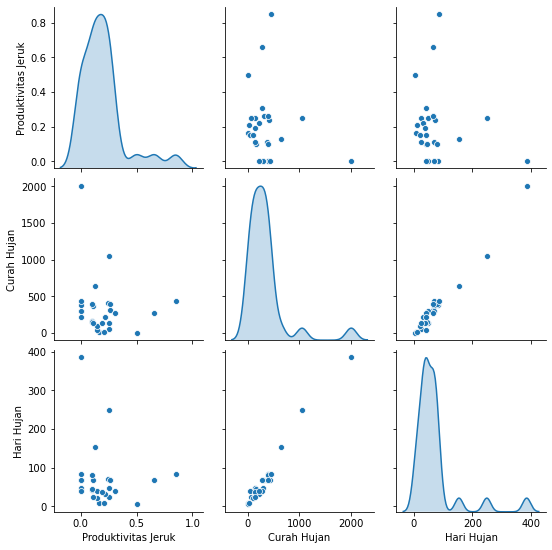

In [35]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[['Produktivitas Jeruk', 'Curah Hujan',
       'Hari Hujan']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

### Insights
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt' 

## Visualising Catagorical Variables

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1 to 12
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Produktivitas Jeruk  28 non-null     float64
 1   Curah Hujan          28 non-null     int64  
 2   Hari Hujan           28 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.1 KB


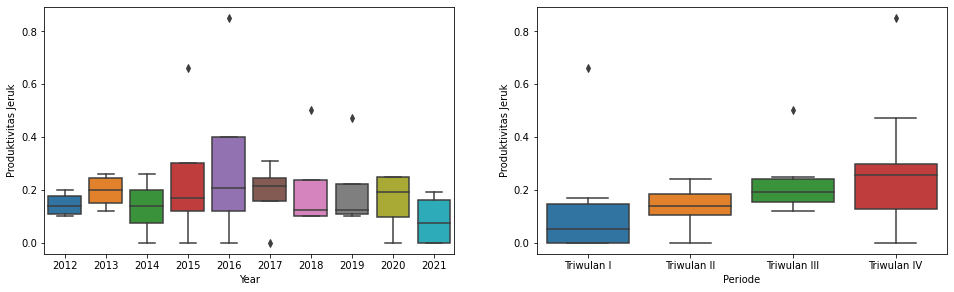

In [37]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'Year', y = 'Produktivitas Jeruk', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'Periode', y = 'Produktivitas Jeruk', data = bike)
plt.show()

### Insights
There were 6 categorical variables in the dataset. 

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) . 

The inference that We could derive were: 
- **season**: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

- **mnth**: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable. 
- **weathersit**: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
- **holiday**: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable. 
- **weekday**: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
- **workingday**: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

## Correlation Matrix

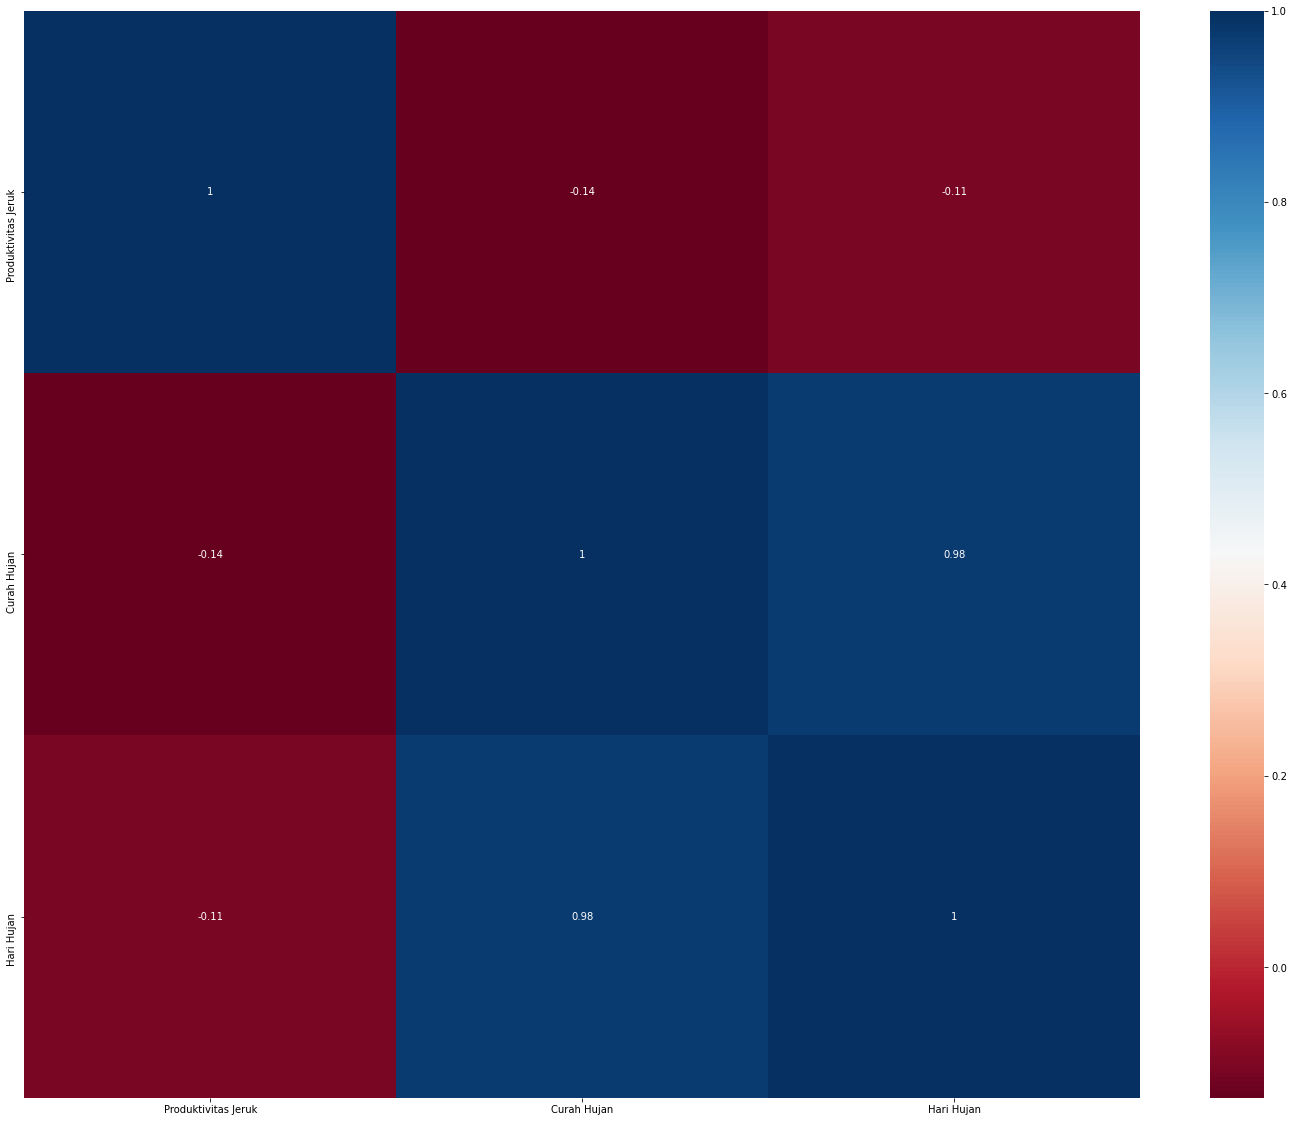

In [38]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_new_new.corr(), annot = True, cmap="RdBu")
plt.show()

### Insights:
 - The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
 - We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# RESCALING THE FEATURES

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
# Checking the values before scaling
df_train.head()

,Produktivitas Jeruk,Curah Hujan,Hari Hujan
1,0.10,164,42
14,0.16,12,9
36,0.00,384,84
11,0.26,319,67
18,0.25,143,47


In [42]:
df_train.columns

Index(['Produktivitas Jeruk', 'Curah Hujan', 'Hari Hujan'], dtype='object')

In [43]:
# Apply scaler() to all the numeric variables

num_vars = ['Produktivitas Jeruk', 'Curah Hujan',
       'Hari Hujan']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [44]:
# Checking values after scaling
df_train.head()

,Produktivitas Jeruk,Curah Hujan,Hari Hujan
1,0.117647,0.079840,0.097368
14,0.188235,0.003992,0.010526
36,0.000000,0.189621,0.207895
11,0.305882,0.157186,0.163158
18,0.294118,0.069361,0.110526


In [45]:
df_train.describe()

,Produktivitas Jeruk,Curah Hujan,Hari Hujan
count,28.000000,28.000000,28.000000
mean,0.233613,0.165490,0.173308
std,0.232085,0.196708,0.205274
min,0.000000,0.000000,0.000000
25%,0.117647,0.065494,0.080921
50%,0.182353,0.134481,0.110526
75%,0.294118,0.194237,0.170395
max,1.000000,1.000000,1.000000


# BUILDING A LINEAR MODEL

## Dividing into X and Y sets for the model building

In [46]:
y_train = df_train.pop('Produktivitas Jeruk')
X_train = df_train

### RFE
Recursive feature elimination: We will be using the **LinearRegression function from SciKit Learn**  for its compatibility with RFE (which is a utility from sklearn)

In [47]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [48]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Curah Hujan', True, 1), ('Hari Hujan', True, 1)]

In [50]:
col = X_train.columns[rfe.support_]
col

Index(['Curah Hujan', 'Hari Hujan'], dtype='object')

In [51]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [52]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [53]:
from scipy import stats
import matplotlib.pyplot as plt

In [54]:
statistic, pvalue = stats.shapiro(X_train_rfe)

print("Shapiro-Wilk test statistic:", statistic)
print("Shapiro-Wilk test p-value:", pvalue)

Shapiro-Wilk test statistic: 0.6396863460540771
Shapiro-Wilk test p-value: 1.8264911805232487e-10


# Building Linear Model using 'STATS MODEL'

## Model 1

### VIF Check

In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Curah Hujan,51.15
1,Hari Hujan,51.15


In [56]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [57]:
# Check the parameters obtained

lr1.params

const          0.261337
Curah Hujan   -0.604167
Hari Hujan     0.416948
dtype: float64

In [58]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                             OLS Regression Results                            
Dep. Variable:     Produktivitas Jeruk   R-squared:                       0.027
Model:                             OLS   Adj. R-squared:                 -0.051
Method:                  Least Squares   F-statistic:                    0.3465
Date:                 Thu, 25 Jan 2024   Prob (F-statistic):              0.710
Time:                         15:27:14   Log-Likelihood:                 2.0599
No. Observations:                   28   AIC:                             1.880
Df Residuals:                       25   BIC:                             5.877
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2613      0.059      4

- Removing the variable 'mnth_3' based on its High 'p-value'.

# Final Model Interpretation

## Hypothesis Testing:

Hypothesis testing states that:
- H0:B1=B2=...=Bn=0 
- H1:  at least one  Bi!=0

### lr1 model coefficient values

- const 0.2613
- Curah Hujan -0.6042
- Hari Hujan 0.4169 

### Insights
- From the lr1 model summary, it is evident that all our coefficients are not equal to zerowhich means **We REJECT the NULL HYPOTHESIS**
    

### F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 0.3465
- Prob (F-statistic): 0.710

The F-Statistics value of 0.3465 and is not the p-value of '~0.0000' states that the overall model is ***not significant

## The equation of best fitted surface based on model lr6:

cnt = 0.2613 - (**Curah Hujan** × -0.6042) + (**Hari Hujan** × 0.4169)

## Interpretation of Coefficients:
**Curah Hujan:** A coefficient value of ‘-0.6042’ menunjukkan bahwa setiap nilai dari variable 'curah hujan' yang bertambah maka akan memberikan dampak negative kepada produktivitas jeruk sebesar 60% secara tidak langsung.

**Hari Hujan:** A coefficient value of ‘0.4169’ menunjukkan bahwa setiap nilai dari variable 'curah hujan' yang bertambah maka akan memberikan dampak positive kepada produktivitas jeruk sebesar 41% secara tidak langsung..

# ASSUMPTIONS 

## Error terms are normally distributed with mean zero (not X, Y)
- Residual Analysis Of Training Data

In [59]:
y_train_pred = lr1.predict(X_train_lm1)

Text(0.5, 0, 'Errors')

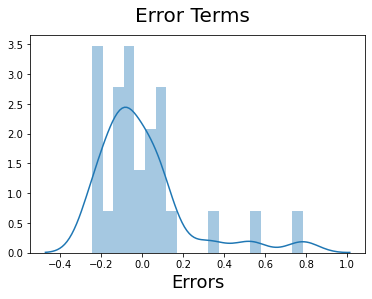

In [60]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Insights
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## There is a linear relationship between X and Y

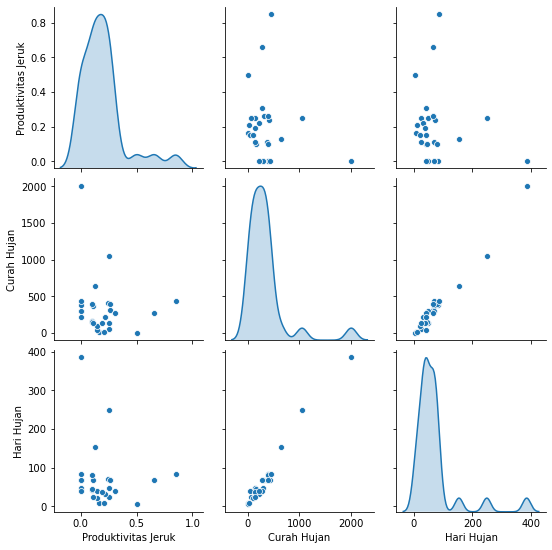

In [61]:
bike_new=bike_new[['Produktivitas Jeruk', 'Curah Hujan',
       'Hari Hujan']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

## Insight
- Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

## There is No Multicollinearity between the predictor variables

In [62]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Curah Hujan,51.15
1,Hari Hujan,51.15


## Insight

 - From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

# MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

### Applying the scaling on the test sets

In [63]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['Produktivitas Jeruk', 'Curah Hujan',
       'Hari Hujan']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [64]:
df_test.head()

,Produktivitas Jeruk,Curah Hujan,Hari Hujan
31,0.552941,0.086327,0.142105
4,0.188235,0.166667,0.171053
6,0.141176,0.039920,0.031579
16,0.000000,0.221557,0.192105
30,0.164706,0.008982,0.015789


In [65]:
df_test.describe()

,Produktivitas Jeruk,Curah Hujan,Hari Hujan
count,12.000000,12.000000,12.000000
mean,0.194118,0.101173,0.110746
std,0.129412,0.085007,0.076373
min,0.000000,0.002994,-0.002632
25%,0.135294,0.028443,0.027632
50%,0.188235,0.096058,0.138158
75%,0.211765,0.153194,0.165132
max,0.552941,0.248004,0.205263


### Dividing into X_test and y_test

In [66]:
y_test = df_test.pop('Produktivitas Jeruk')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 31 to 0
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Curah Hujan  12 non-null     float64
 1   Hari Hujan   12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [67]:
#Selecting the variables that were part of final model.
col1=X_train_rfe.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm1 = sm.add_constant(X_test)
X_test_lm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 31 to 0
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   const        12 non-null     float64
 1   Curah Hujan  12 non-null     float64
 2   Hari Hujan   12 non-null     float64
dtypes: float64(3)
memory usage: 384.0 bytes


In [68]:
# Making predictions using the final model (lr6)

y_pred = lr1.predict(X_test_lm1)

# MODEL EVALUATION

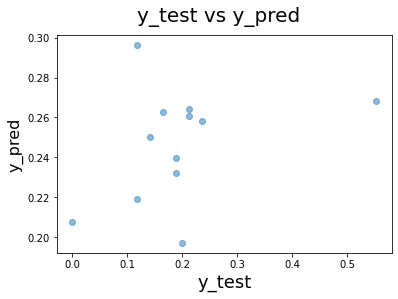

In [69]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

 # R^2 Value for TEST

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.07480513719202886

## Adjusted R^2 Value for TEST

In [71]:
# We already have the value of R^2 (calculated in above step)

r2=-0.07480513719202886

In [72]:
# Get the shape of X_test
X_test.shape


(12, 2)

In [73]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

-0.3136507232347019

# Final Result Comparison

- Train R^2 :0.027
- Train Adjusted R^2 :-0.051
- Test R^2 :-0.0748
- Test Adjusted R^2 :-0.3136 
- Model ini belum bisa dikatakan cocok dengan data yang ada. Data yang sedikit juga mempengaruhi hasil dari nilai yang didapat diatas.